In [ ]:
# Basic Importation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings("ignore")

**DATA LOADING**

In [ ]:
# Import dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
phishing_df_1 = pd.read_csv("/content/drive/MyDrive/Dataset/kaggle_phishing_email.csv")
phishing_df_1.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [ ]:
phishing_df_1.shape

(18650, 3)

In [ ]:
phishing_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18650 entries, 0 to 18649
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  18650 non-null  int64 
 1   Email Text  18634 non-null  object
 2   Email Type  18650 non-null  object
dtypes: int64(1), object(2)
memory usage: 437.2+ KB


In [ ]:
# Get the counts of the two email types
phishing_df_1["Email Type"].value_counts()

,count
Email Type,
Safe Email,11322
Phishing Email,7328


**DATA PREPROCESSING AND FEATURE SELECTION**

In [ ]:
# Preprocessing
import nltk
nltk.download("stopwords")
nltk.download("punkt")
nltk.download("punkt_tab")
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import tokenize
import string
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
phishing_df_1.drop(columns=["Unnamed: 0"], inplace=True)
phishing_df_1.head()

,Email Text,Email Type
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [ ]:
# Check for missing values
phishing_df_1.isna().sum()

,0
Email Text,16
Email Type,0


In [ ]:
# Drop missing values
phishing_df_1 = phishing_df_1.dropna()
phishing_df_1.isna().sum()

,0
Email Text,0
Email Type,0


In [ ]:
# Check rows with "empty" value
phishing_df_1["Email Text"].apply(lambda x: x.strip().lower()=="empty").sum()

533

In [ ]:
# Remove rows with "empty" value
phishing_df_1 = phishing_df_1[~(phishing_df_1["Email Text"].apply(lambda x: x.strip().lower()=="empty"))]
phishing_df_1["Email Text"].apply(lambda x: x.strip().lower()=="empty").sum()

0

In [ ]:
# Check for duplicates
duplicates = phishing_df_1[phishing_df_1.duplicated()]
print(duplicates)

                                              Email Text      Email Type
770    formal invite for chase . secrets revealed . h...  Phishing Email
1122   schedulec - dailyo 301 . xls the enclosed file...      Safe Email
1178   <äº‹æ¥­è€…>\næ°å:Vip-mail\nçªç„¶ã®ãƒ¡ãƒ¼ã...  Phishing Email
1241   pill that will solve your problems i promise ;...  Phishing Email
1485   URL: http://www.askbjoernhansen.com/archives/2...      Safe Email
...                                                  ...             ...
18418  Dear Sir,   *Â¡Â°Ã–ÃÃ‚Â·ÃÂ¨Ã…Ã¤Â¼Ã¾Â³Â§Â¡Â±Ã...  Phishing Email
18455  ' top law firm dear debbiee , legal services f...  Phishing Email
18456  Dear hulkjr ,WANT THE BEST IN COMPUTER FILE SE...  Phishing Email
18511  confirm your application dear applicant , your...  Phishing Email
18538  retail markets conference i would like to invi...      Safe Email

[565 rows x 2 columns]


In [ ]:
"""
# Remove duplicates
phishing_df = phishing_df.drop_duplicates(keep='first')
phishing_df.duplicated().sum()
"""

"\n# Remove duplicates\nphishing_df = phishing_df.drop_duplicates(keep='first')\nphishing_df.duplicated().sum()\n"

In [ ]:
# Rename columns
phishing_df_1 = phishing_df_1.rename(columns={"Email Text": "text", "Email Type": "label"})
phishing_df_1.head()

,text,label
0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,the other side of * galicismos * * galicismo *...,Safe Email
2,re : equistar deal tickets are you still avail...,Safe Email
3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,software at incredibly low prices ( 86 % lower...,Phishing Email


**Exploratory Data Analysis (EDA)**

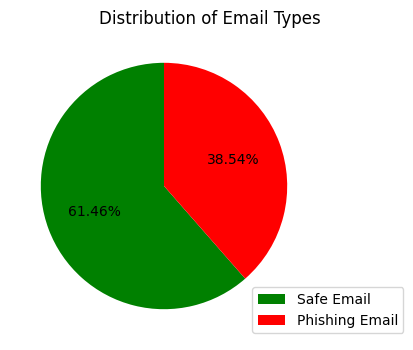

In [ ]:
# Count the values of each Email Type
label_counts = phishing_df_1["label"].value_counts()
email_types = label_counts.index.tolist()

# Define colors for mapping
color_map = {
    "Phishing Email": "red",
    "Safe Email": "green"}

# Map the colors to each Email Type
colors = [color_map.get(email_type, 'gray') for email_type in email_types]

# Create the pie chart with the custom colors
plt.figure(figsize=(7, 4))
plt.pie(label_counts, colors=colors, autopct='%.2f%%', startangle=90)
plt.legend(["Safe Email", "Phishing Email"], loc="lower right", bbox_to_anchor=(1.3, 0))
plt.title("Distribution of Email Types", x=0.65)

# Show the chart
plt.show()

In [ ]:
"""
# Implement downsampling
Safe_Email = phishing_df_1[phishing_df_1["label"]=="Safe Email"]
Phishing_Email = phishing_df_1[phishing_df_1["label"]=="Phishing Email"]
Safe_Email = Safe_Email.sample(Phishing_Email.shape[0], random_state=15)

# Check for the shapes of the two dataframes
Safe_Email.shape, Phishing_Email.shape
"""

'\n# Implement downsampling\nSafe_Email = phishing_df_1[phishing_df_1["label"]=="Safe Email"]\nPhishing_Email = phishing_df_1[phishing_df_1["label"]=="Phishing Email"]\nSafe_Email = Safe_Email.sample(Phishing_Email.shape[0], random_state=15)\n\n# Check for the shapes of the two dataframes\nSafe_Email.shape, Phishing_Email.shape\n'

In [ ]:
"""
# Concatenate the two dataframes
phishing_df_1 = pd.concat([Safe_Email, Phishing_Email], ignore_index=True)

# Shuffle the balanced dataframe
phishing_df_1 = phishing_df_1.sample(frac=1, random_state=15).reset_index(drop=True)
phishing_df_1.head()
"""

'\n# Concatenate the two dataframes\nphishing_df_1 = pd.concat([Safe_Email, Phishing_Email], ignore_index=True)\n\n# Shuffle the balanced dataframe\nphishing_df_1 = phishing_df_1.sample(frac=1, random_state=15).reset_index(drop=True)\nphishing_df_1.head()\n'

In [ ]:
# Get the counts of the two email types
phishing_df_1["label"].value_counts()

,count
label,
Safe Email,11124
Phishing Email,6977


In [ ]:
sw = stopwords.words("english") + ["u", "ü", "ur", "4", "2", "im", "dont", "doin", "ure"]
ps = PorterStemmer()

def text_preprocessing(text):
  text = text.strip().lower() # Strip and Lowercase
  text = re.sub(r"http\S+", '', text) # Remove Hyperlinks
  text = re.sub('[^a-z0-9]', ' ', text) # Remove Special Characters including Punctuations
  words = tokenize.word_tokenize(text) # Tokenize the Text
  filtered_words = [ps.stem(word) for word in words if word not in sw] # Filter Stopwords and Stem Words
  transformed_text = " ".join(filtered_words)
  return transformed_text

phishing_df_1["cleaned text"] = phishing_df_1["text"].apply(text_preprocessing)
cleaned_df_1 = phishing_df_1[["cleaned text", "label"]]
cleaned_df_1.head()

,cleaned text,label
0,6 1100 disc uniformitarian 1086 sex lang dick ...,Safe Email
1,side galicismo galicismo spanish term name imp...,Safe Email
2,equistar deal ticket still avail assist robert...,Safe Email
3,hello hot lil horni toy one dream open mind pe...,Phishing Email
4,softwar incred low price 86 lower draperi seve...,Phishing Email


In [ ]:
# Remove empty row after preprocessing
cleaned_df_1 = cleaned_df_1[~(cleaned_df_1["cleaned text"].apply(lambda x: x==""))]
cleaned_df_1["cleaned text"].apply(lambda x: x=="").sum()

0


**DATA SPLITTING AND FEATURE TRANSFORMATION**

In [ ]:
# Train - Test Split
from sklearn.model_selection import train_test_split

# Data Transformation
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Encode Phishing Email and Safe Email
cleaned_df_1["label enc"] = cleaned_df_1["label"].map({"Safe Email": 0, "Phishing Email": 1})
cleaned_df_1.drop(["label"], axis=1, inplace=True)
cleaned_df_1.head()

,cleaned text,label enc
0,6 1100 disc uniformitarian 1086 sex lang dick ...,0
1,side galicismo galicismo spanish term name imp...,0
2,equistar deal ticket still avail assist robert...,0
3,hello hot lil horni toy one dream open mind pe...,1
4,softwar incred low price 86 lower draperi seve...,1


In [ ]:
# Save the Cleaned Dataset to personal Google Drive account
cleaned_df_1.to_csv("/content/drive/MyDrive/Dataset/cleaned_kaggle_phishing_email.csv", index=False)

In [ ]:
# Define Features and Target as X and y respectively
X, y = cleaned_df_1["cleaned text"], cleaned_df_1["label enc"]

# Split the Cleaned Dataset into the ratio of 7:3
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=15
)

print(f"X_train Shape: {X_train.shape} - y_train Shape: {y_train.shape}")
print(f"X_test Shape: {X_test.shape} - y_test Shape: {y_test.shape}")

X_train Shape: (12667,) - y_train Shape: (12667,)
X_test Shape: (5429,) - y_test Shape: (5429,)


In [ ]:
# Initialize TF-IDF
tfidf = TfidfVectorizer(ngram_range=(1, 2), max_features=10000)

# Fit and Transform X_train
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform X_test
X_test_tfidf = tfidf.transform(X_test)

# Inspect Dimensions
X_train_tfidf.shape, X_test_tfidf.shape

((12667, 10000), (5429, 10000))

In [ ]:
sparsity = (1.0 - (X_train_tfidf.nnz / float(X_train_tfidf.shape[0] * X_train_tfidf.shape[1]))) * 100
print(f"Sparsity Percentage of the TF-IDF Matrix: {sparsity:.2f}%")

Sparsity Percentage of the TF-IDF Matrix: 99.00%


**HYPERPARAMETER TUNING AND MODEL TRAINING**

In [ ]:
# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Cross-Validation
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=15)

**Logistic Regression**

In [ ]:
"""
grid_lr_1 = {
    "C": np.logspace(-2, 2, 10),
    "penalty": ["l1", "l2", "none"],
    "solver": ["lbfgs", "liblinear", "saga"],
}

scoring = ["accuracy", "precision", "recall", "f1"]

algo_lr_1 = GridSearchCV(LogisticRegression(max_iter=1000), param_grid=grid_lr_1, cv=kfold, scoring=scoring, refit="f1")

model_lr_1 = algo_lr_1.fit(X_train_tfidf, y_train)
lr_1_best_params = model_lr_1.best_estimator_

print("penalty:", lr_1_best_params.get_params()["penalty"])
print("C:", lr_1_best_params.get_params()["C"])
print("solver:", lr_1_best_params.get_params()["solver"])
"""

'\ngrid_lr_1 = {\n    "C": np.logspace(-2, 2, 10),\n    "penalty": ["l1", "l2", "none"],\n    "solver": ["lbfgs", "liblinear", "saga"],\n}\n\nscoring = ["accuracy", "precision", "recall", "f1"]\n\nalgo_lr_1 = GridSearchCV(LogisticRegression(max_iter=1000), param_grid=grid_lr_1, cv=kfold, scoring=scoring, refit="f1")\n\nmodel_lr_1 = algo_lr_1.fit(X_train_tfidf, y_train)\nlr_1_best_params = model_lr_1.best_estimator_\n\nprint("penalty:", lr_1_best_params.get_params()["penalty"])\nprint("C:", lr_1_best_params.get_params()["C"])\nprint("solver:", lr_1_best_params.get_params()["solver"])\n'

In [ ]:
C = np.logspace(-2, 2, 10)
C_ = C[7]

In [ ]:
algo_lr_1 = LogisticRegression(C=C_, penalty="l2", solver="liblinear")
model_lr_1 = algo_lr_1.fit(X_train_tfidf, y_train)

In [ ]:
y_pred_lr_1 = model_lr_1.predict(X_test_tfidf)

**Support Vector Machine**

In [ ]:
"""
grid_svc_1 = {
    "C": [0.01, 0.1, 1, 10, 100],
    "kernel": ["linear", "poly", "rbf"],
    "gamma": ["scale", "auto"]
}

scoring = ["accuracy", "precision", "recall", "f1"]

algo_svc_1 = GridSearchCV(SVC(), param_grid=grid_svc_1, cv=kfold, scoring=scoring, refit="f1")

model_svc_1 = algo_svc_1.fit(X_train_tfidf, y_train)
svc_1_best_params = model_svc_1.best_estimator_

print("C:", svc_1_best_params.get_params()["C"])
print("kernel:", svc_1_best_params.get_params()["kernel"])
print("gamma:", svc_1_best_params.get_params()["gamma"])
"""

'\ngrid_svc_1 = {\n    "C": [0.01, 0.1, 1, 10, 100],\n    "kernel": ["linear", "poly", "rbf"],\n    "gamma": ["scale", "auto"]\n}\n\nscoring = ["accuracy", "precision", "recall", "f1"]\n\nalgo_svc_1 = GridSearchCV(SVC(), param_grid=grid_svc_1, cv=kfold, scoring=scoring, refit="f1")\n\nmodel_svc_1 = algo_svc_1.fit(X_train_tfidf, y_train)\nsvc_1_best_params = model_svc_1.best_estimator_\n\nprint("C:", svc_1_best_params.get_params()["C"])\nprint("kernel:", svc_1_best_params.get_params()["kernel"])\nprint("gamma:", svc_1_best_params.get_params()["gamma"])\n'

In [ ]:
algo_svc_1 = SVC(C=10, gamma="scale", kernel="rbf")
model_svc_1 = algo_svc_1.fit(X_train_tfidf, y_train)

In [ ]:
model_svc_1 = algo_svc_1.fit(X_train_tfidf, y_train)

In [ ]:
y_pred_svc_1 = model_svc_1.predict(X_test_tfidf)

**EVALUATION**

**Logistic Regression**

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3309
           1       0.97      0.97      0.97      2120

    accuracy                           0.98      5429
   macro avg       0.98      0.98      0.98      5429
weighted avg       0.98      0.98      0.98      5429



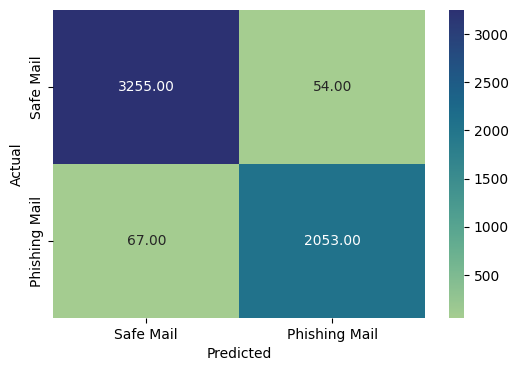

In [ ]:
print(classification_report(y_test, y_pred_lr_1))
cm_lr = confusion_matrix(y_test, y_pred_lr_1)
plt.figure(figsize=(6,4))
sns.heatmap(
    cm_lr, annot=True,
    fmt='.2f',
    xticklabels=["Safe Mail", "Phishing Mail"],
    yticklabels=["Safe Mail", "Phishing Mail"],
    cmap="crest"
)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

**Support Vector Machine**

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3309
           1       0.98      0.97      0.97      2120

    accuracy                           0.98      5429
   macro avg       0.98      0.98      0.98      5429
weighted avg       0.98      0.98      0.98      5429



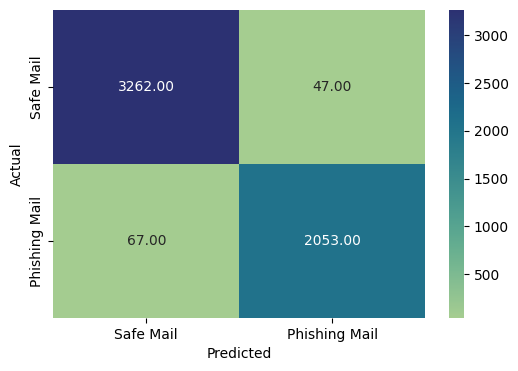

In [ ]:
print(classification_report(y_test, y_pred_svc_1))
cm_svc = confusion_matrix(y_test, y_pred_svc_1)
plt.figure(figsize=(6,4))
sns.heatmap(
    cm_svc, annot=True,
    fmt='.2f',
    xticklabels=["Safe Mail", "Phishing Mail"],
    yticklabels=["Safe Mail", "Phishing Mail"],
    cmap="crest"
)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [ ]:
print("LR - f1 score:", f1_score(y_test, y_pred_lr_1))
print("SVM - f1 score:", f1_score(y_test, y_pred_svc_1))

LR - f1 score: 0.9713744972793944
SVM - f1 score: 0.9729857819905213
